# House Sales Price Prediction-Regression Analysis


# Problem Statement:

 To predict the sales price for each house. For each Id in the test set,predict the value of the SalePrice variable.Created model on
training dataset and made predictions on testing dataset. Used Linear Regression for prediction.


# 1] Fetch Data:



Model is created on Training Dataset & predictions are made on Testing Dataset.

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")
import pandas as pd
trd = pd.read_csv("E:/Desktop/training_set.csv")
tsd = pd.read_csv("E:/Desktop/testing_set.csv")

In [2]:
trd.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
tsd.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# 2] Missing Data Treatment:



Cleaning the data by removing NaN values/columns with no statistical importance from the dataset.

In [4]:
#training dataset
Q = pd.DataFrame(trd.isna().sum(),columns=["ct"])
Q[Q.ct > 0].index 

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [5]:
#testing dataset
Q = pd.DataFrame(tsd.isna().sum(),columns=["ct"])
Q[Q.ct > 0].index

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')

In [6]:
from PM8 import replacer
replacer(trd)
replacer(tsd)

# 3] Drop Unnecessary Columns:

In [7]:
trd1 = trd.drop(labels=["Id"],axis=1)
tsd1 = tsd.drop(labels=["Id"],axis=1)

# 4] Find Categorical & Continuous Columns:

In [8]:
cat = []
con = []
for i in trd1.columns:
    if(trd1[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i) 

In [9]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [10]:
con

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

# 5] Bivariate Analysis and Skew Removal:


<AxesSubplot:>

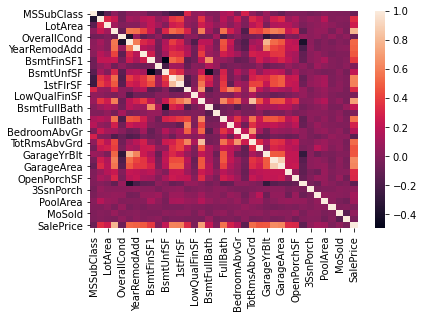

In [11]:
import seaborn as sb
sb.heatmap(trd1.corr())

In [12]:
Q = trd1.corr()[["SalePrice"]]
con_cols_to_consider = list(Q[Q.SalePrice > 0.3].sort_values(by="SalePrice",ascending=False).index)
con_cols_to_consider.remove("SalePrice")

In [13]:
def ANOVA(df,cat,con):
    from pandas import DataFrame
    from statsmodels.api import OLS
    from statsmodels.formula.api import ols
    rel = con + " ~ " + cat
    model = ols(rel,df).fit()
    from statsmodels.stats.anova import anova_lm
    anova_results = anova_lm(model)
    Q = DataFrame(anova_results)
    a = Q['PR(>F)'][cat]
    return round(a,3)


In [14]:
W = []
for i in cat:
    W.append(ANOVA(trd1,i,"SalePrice"))

In [15]:
Q = pd.DataFrame([cat,W]).T
Q.columns = ["column","pval"]

In [16]:
Q

,column,pval
0,MSZoning,0.0
1,Street,0.117
2,Alley,0.291
3,LotShape,0.0
4,LandContour,0.0
5,Utilities,0.585
6,LotConfig,0.0
7,LandSlope,0.141
8,Neighborhood,0.0
9,Condition1,0.0


In [17]:
cat_cols_to_consider = list(Q[Q.pval < 0.1].column)

In [18]:
cat_cols_to_consider

['MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'SaleType',
 'SaleCondition']

# 6] Preprocessing of Training Set:



6.1) Label Encoding done on categorical columns.

6.2) Standardization done on continuous columns.

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
tr1 = trd1[cat_cols_to_consider].apply(le.fit_transform)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
tr2 = pd.DataFrame(ss.fit_transform(trd1[con_cols_to_consider]),columns=con_cols_to_consider)

In [20]:
trd3 = tr2.join(tr1)

In [21]:
trd3.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,SaleType,SaleCondition
0,0.651479,0.370333,0.311725,0.351000,-0.459303,-0.793434,0.789741,0.912210,1.050994,0.878668,...,2,1,1,4,4,2,2,2,8,4
1,-0.071836,-0.482512,0.311725,-0.060731,0.466465,0.257140,0.789741,-0.318683,0.156734,-0.429577,...,4,1,1,4,4,2,2,2,8,4
2,0.651479,0.515013,0.311725,0.631726,-0.313369,-0.627826,0.789741,-0.318683,0.984752,0.830215,...,4,1,1,4,4,2,2,2,8,4
3,0.651479,0.383659,1.650307,0.790804,-0.687324,-0.521734,-1.026041,0.296763,-1.863632,-0.720298,...,2,5,2,4,4,2,2,2,8,0
4,1.374795,1.299326,1.650307,1.698485,0.199680,-0.045611,0.789741,1.527656,0.951632,0.733308,...,4,1,1,4,4,2,2,2,8,4


In [22]:
trd3.shape

(1460, 56)

# 7] Preprocessing of Testing(Prediction) Set:

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ts1 = tsd1[cat_cols_to_consider].apply(le.fit_transform)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ts2 = pd.DataFrame(ss.fit_transform(tsd1[con_cols_to_consider]),columns=con_cols_to_consider)

In [25]:
tsd3 = ts2.join(ts1)
tsd3.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,SaleType,SaleCondition
0,-0.751101,-1.215588,-0.988013,1.185945,-0.370808,-0.654561,-1.028720,-0.918335,-0.340945,-1.072885,...,2,1,2,3,4,2,0,2,8,4
1,-0.054877,-0.323539,-0.988013,-0.741213,0.639144,0.433298,-1.028720,-0.255371,-0.439695,-1.214908,...,2,1,2,3,4,2,0,2,8,4
2,-0.751101,0.294508,0.301623,0.042559,-0.266876,-0.574165,0.773083,-0.255371,0.844059,0.678742,...,4,1,0,3,4,2,0,2,8,4
3,-0.054877,0.243004,0.301623,-0.012766,-0.271395,-0.579190,0.773083,0.407593,0.876976,0.678742,...,2,1,0,3,4,2,0,2,8,4
4,1.337571,-0.424487,0.301623,0.153210,0.528434,0.310192,0.773083,-0.918335,0.679475,0.394694,...,2,1,1,3,4,2,0,2,8,4


In [26]:
tsd3.shape

(1459, 56)

# 8] Define X and Y :



Divide the data into training and testing set for model creation.

In [27]:
X = trd3
Y = trd[["SalePrice"]]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=31)

# 9] Create a Backward Elemination OLS Model:

In [28]:
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     116.4
Date:                Thu, 17 Feb 2022   Prob (F-statistic):               0.00
Time:                        00:30:48   Log-Likelihood:                -13680.
No. Observations:                1168   AIC:                         2.747e+04
Df Residuals:                    1111   BIC:                         2.776e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.227e+05   2.84e+04     11.349      0.000    2.67e+05    3.78e+05
OverallQual    1.635e+04   1682.758      9.714      0.000     1.3e+04    1.96e+04
GrLivArea      7354.7514   1.07e+04      0.689      0.491   -1.36e+04    2.83e+04
GarageCars     9974.9600   2160.507      4.617      0.000    5735.827    1.42e+04
GarageArea    -2118.9538   2141.115     -0.990      0.323   -6320.039    2082.132
TotalBsmtSF    -252.8007   1851.231     -0.137      0.891   -3885.103    3379.502
1stFlrSF       1.514e+04   7961.191      1.902      0.057    -479.315    3.08e+04
FullBath       -174.7651   1403.452     -0.125      0.901   -2928.481    2578.951
TotRmsAbvGrd    617.2483   1738.003      0.355      0.723   -2792.890    4027.386
YearBuilt      2007.5867   2194.331      0.915      0.360   -2297.914    6313.087
YearRemodAdd   3112.0183   1364.490      2.281      0.023     434.751    5789.286
MasVnrArea     6893.9656   1183.228      5.826      0.000    4572.352    9215.579
GarageYrBlt   -1064.9000   1676.639     -0.635      0.525   -4354.635    2224.835
Fireplaces     4040.4906   1187.122      3.404      0.001    1711.237    6369.744
BsmtFinSF1     5355.6486   1394.059      3.842      0.000    2620.363    8090.934
LotFrontage   -4663.7351   1169.478     -3.988      0.000   -6958.371   -2369.100
WoodDeckSF     2100.9684   1002.205      2.096      0.036     134.540    4067.396
2ndFlrSF       1.332e+04   8884.047      1.500      0.134   -4108.700    3.08e+04
OpenPorchSF    1017.4374    999.478      1.018      0.309    -943.639    2978.514
MSZoning      -1603.4098   1642.609     -0.976      0.329   -4826.376    1619.556
LotShape      -1695.4653    693.916     -2.443      0.015   -3056.999    -333.932
LandContour    1323.5849   1319.793      1.003      0.316   -1265.982    3913.152
LotConfig       340.2417    591.455      0.575      0.565    -820.253    1500.737
Neighborhood    107.6951    165.343      0.651      0.515    -216.725     432.115
Condition1      301.7986   1136.684      0.266      0.791   -1928.491    2532.088
Condition2      836.0987   3246.436      0.258      0.797   -5533.738    7205.935
BldgType      -7227.0633    909.439     -7.947      0.000   -9011.474   -5442.652
HouseStyle    -1982.5823    617.936     -3.208      0.001   -3195.036    -770.129
RoofStyle      2238.2525   1185.607      1.888      0.059     -88.029    4564.534
RoofMatl       5962.1637   1557.432      3.828      0.000    2906.323    9018.004
Exterior1st    -891.3245    587.184     -1.518      0.129   -2043.439     260.790
Exterior2nd     183.4697    537.652      0.341      0.733    -871.459    1238.398
MasVnrType     5529.1947   1685.252      3.281      0.001    2222.559    8835.830
ExterQual     -8241.7151   2112.965     -3.901      0.000   -1.24e+04   -4095.863
ExterCond      -153.9514   1326.171     -0.116   

# 10] Remove unnecessary columns on the basis of pvalue:


In [29]:
col_to_drop = ols.pvalues.sort_values(ascending=False).index[0]

In [30]:
X = X.drop(labels=[col_to_drop],axis=1)
Y = trd[["SalePrice"]]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     118.7
Date:                Thu, 17 Feb 2022   Prob (F-statistic):               0.00
Time:                        00:30:52   Log-Likelihood:                -13680.
No. Observations:                1168   AIC:                         2.747e+04
Df Residuals:                    1112   BIC:                         2.775e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.222e+05   2.81e+04     11.446      0.000    2.67e+05    3.77e+05
OverallQual    1.634e+04   1681.729      9.718      0.000     1.3e+04    1.96e+04
GrLivArea      7395.7054   1.07e+04      0.694      0.488   -1.35e+04    2.83e+04
GarageCars     9960.6765   2156.043      4.620      0.000    5730.305    1.42e+04
GarageArea    -2112.2074   2139.377     -0.987      0.324   -6309.878    2085.463
TotalBsmtSF    -266.8470   1846.452     -0.145      0.885   -3889.771    3356.077
1stFlrSF       1.512e+04   7955.136      1.900      0.058    -490.689    3.07e+04
FullBath       -167.1461   1401.295     -0.119      0.905   -2916.626    2582.334
TotRmsAbvGrd    616.1735   1737.207      0.355      0.723   -2792.400    4024.747
YearBuilt      1963.9861   2160.990      0.909      0.364   -2276.092    6204.064
YearRemodAdd   3122.6783   1360.792      2.295      0.022     452.668    5792.688
MasVnrArea     6895.6494   1182.614      5.831      0.000    4575.242    9216.056
GarageYrBlt   -1062.3262   1675.748     -0.634      0.526   -4350.311    2225.658
Fireplaces     4038.1182   1186.419      3.404      0.001    1710.245    6365.991
BsmtFinSF1     5360.5343   1392.806      3.849      0.000    2627.711    8093.358
LotFrontage   -4667.9121   1168.406     -3.995      0.000   -6960.441   -2375.383
WoodDeckSF     2104.4282   1001.317      2.102      0.036     139.744    4069.112
2ndFlrSF       1.328e+04   8872.967      1.497      0.135   -4128.286    3.07e+04
OpenPorchSF    1025.8610    996.398      1.030      0.303    -929.171    2980.893
MSZoning      -1593.6424   1639.725     -0.972      0.331   -4810.946    1623.661
LotShape      -1698.3075    693.176     -2.450      0.014   -3058.388    -338.227
LandContour    1324.7682   1319.168      1.004      0.315   -1263.570    3913.107
LotConfig       339.4412    591.153      0.574      0.566    -820.459    1499.341
Neighborhood    107.5892    165.267      0.651      0.515    -216.682     431.860
Condition1      295.1102   1134.719      0.260      0.795   -1931.322    2521.543
Condition2      849.1766   3243.041      0.262      0.793   -5513.993    7212.346
BldgType      -7232.1444    907.982     -7.965      0.000   -9013.695   -5450.594
HouseStyle    -1983.6024    617.600     -3.212      0.001   -3195.394    -771.811
RoofStyle      2233.8574   1184.477      1.886      0.060     -90.204    4557.919
RoofMatl       5965.6805   1556.447      3.833      0.000    2911.777    9019.584
Exterior1st    -892.8584    586.775     -1.522      0.128   -2044.169     258.452
Exterior2nd     183.6968    537.410      0.342      0.733    -870.756    1238.149
MasVnrType     5521.4108   1683.170      3.280      0.001    2218.863    8823.959
ExterQual     -8261.6477   2105.042     -3.925      0.000   -1.24e+04   -4131.345
Foundation     -221.6601   1757.635     -0.126   

# 11] Find Error:

In [31]:
col_to_drop = ols.pvalues.sort_values(ascending=False).index[0]
col_to_drop

'FullBath'

In [32]:
col_to_drop = ols.pvalues.sort_values(ascending=False).index[0]
print(col_to_drop)
X = X.drop(labels=[col_to_drop],axis=1)
Y = trd[["SalePrice"]]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst).fit()
print(ols.summary())

FullBath
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     121.0
Date:                Thu, 17 Feb 2022   Prob (F-statistic):               0.00
Time:                        00:30:53   Log-Likelihood:                -13680.
No. Observations:                1168   AIC:                         2.747e+04
Df Residuals:                    1113   BIC:                         2.775e+04
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.222e+05   2.81e+04  

# 12] Check for Colinearity & Multicolinearity:


In [33]:
X.columns

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'GarageYrBlt', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF',
       '2ndFlrSF', 'OpenPorchSF', 'MSZoning', 'LotShape', 'LandContour',
       'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

In [34]:
X.corr()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,SaleType,SaleCondition
OverallQual,1.000000,0.593007,0.600671,0.562022,0.537808,0.476224,0.427452,0.572323,0.550684,0.410238,...,0.064349,-0.297995,-0.538529,0.090562,0.144988,0.229393,-0.074345,0.017985,-0.060472,0.193703
GrLivArea,0.593007,1.000000,0.467247,0.468997,0.454868,0.566024,0.825489,0.199010,0.287389,0.389893,...,0.169837,-0.158783,-0.345646,0.014458,0.060616,0.080195,-0.160523,-0.021475,-0.041480,0.080729
GarageCars,0.600671,0.467247,1.000000,0.882475,0.434585,0.439317,0.362289,0.537850,0.420622,0.363778,...,0.111637,-0.116844,-0.475862,0.093316,0.077340,0.284598,-0.037682,0.028115,-0.068295,0.184943
GarageArea,0.562022,0.468997,0.882475,1.000000,0.486665,0.489782,0.337822,0.478954,0.371600,0.372567,...,0.064570,-0.102921,-0.416669,0.101302,0.086499,0.284885,-0.055290,0.024052,-0.090670,0.181284
TotalBsmtSF,0.537808,0.454868,0.434585,0.486665,1.000000,0.819530,0.285573,0.391452,0.291066,0.362452,...,0.000242,-0.329053,-0.363421,0.087440,0.106404,0.210346,-0.068009,0.053234,-0.094983,0.110853
1stFlrSF,0.476224,0.566024,0.439317,0.489782,0.819530,1.000000,0.409516,0.281986,0.240379,0.342160,...,0.045741,-0.320468,-0.323798,0.084884,0.100718,0.163412,-0.070055,0.014630,-0.118436,0.075893
TotRmsAbvGrd,0.427452,0.825489,0.362289,0.337822,0.285573,0.409516,1.000000,0.095589,0.191740,0.280027,...,0.118717,-0.088995,-0.240464,-0.002250,0.017801,-0.003618,-0.070852,-0.036973,-0.041252,0.070660
YearBuilt,0.572323,0.199010,0.537850,0.478954,0.391452,0.281986,0.095589,1.000000,0.592855,0.314745,...,0.100827,-0.443241,-0.590044,0.303839,0.246576,0.427561,0.013066,0.086481,-0.052425,0.201044
YearRemodAdd,0.550684,0.287389,0.420622,0.371600,0.291066,0.240379,0.191740,0.592855,1.000000,0.179186,...,0.012054,-0.271764,-0.456786,0.130241,0.150579,0.168457,-0.015982,0.049834,0.019647,0.221687
MasVnrArea,0.410238,0.389893,0.363778,0.372567,0.362452,0.342160,0.280027,0.314745,0.179186,1.000000,...,0.060404,-0.158463,-0.272714,0.106678,0.068356,0.145145,0.015567,0.016810,-0.055715,0.087729


# 13] Ceate Lasso Model:


Done to avoid overfitting of the model.

13.1)Create a Tuning Grid

13.2)Create GridSearchCV model--- Library function to find the best penalty value for Lasso.

13.3)Using the best value of alpha,create the Lasso Model


In [35]:
#13.1
from sklearn.linear_model import Lasso
ls = Lasso()
tg = {"alpha":[0.99,0.98,0.97,1.01,1.02,1.03]}
#13.2
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(ls,tg,scoring="neg_mean_squared_error",cv=5)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'alpha': 1.03}

In [36]:
#13.3
ls = Lasso(alpha=1.03)
model = ls.fit(X,Y)

# 14] Prediction done on Testing Dataset:

In [37]:
pred = model.predict(tsd3[list(X.columns)])
pred

array([213247.79534253, 276416.24887358, 289001.6651512 , ...,
       243965.86601625, 237327.60906532, 352142.7176692 ])

In [38]:
tsd["predicted_Sale_Price"]=pred

In [39]:
tsd

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,predicted_Sale_Price
0,1461,20,RH,80.0,11622,Pave,Grvl,Reg,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal,213247.795343
1,1462,20,RL,81.0,14267,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,MnPrv,Gar2,12500,6,2010,WD,Normal,276416.248874
2,1463,60,RL,74.0,13830,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,3,2010,WD,Normal,289001.665151
3,1464,60,RL,78.0,9978,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal,302128.880313
4,1465,120,RL,43.0,5005,Pave,Grvl,IR1,HLS,AllPub,...,0,Ex,MnPrv,Shed,0,1,2010,WD,Normal,297554.786077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Grvl,Reg,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,6,2006,WD,Normal,177070.731931
1455,2916,160,RM,21.0,1894,Pave,Grvl,Reg,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,4,2006,WD,Abnorml,170923.189524
1456,2917,20,RL,160.0,20000,Pave,Grvl,Reg,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,9,2006,WD,Abnorml,243965.866016
1457,2918,85,RL,62.0,10441,Pave,Grvl,Reg,Lvl,AllPub,...,0,Ex,MnPrv,Shed,700,7,2006,WD,Normal,237327.609065


In [40]:
tsd[["Id","predicted_Sale_Price"]]

,Id,predicted_Sale_Price
0,1461,213247.795343
1,1462,276416.248874
2,1463,289001.665151
3,1464,302128.880313
4,1465,297554.786077
...,...,...
1454,2915,177070.731931
1455,2916,170923.189524
1456,2917,243965.866016
1457,2918,237327.609065


# Hence,the Sales Price for each Id of the house in the test data is predicted.
